In [9]:
!pip install Faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.4 MB/s eta 0:00:00


## **Dataset Generation**

In [10]:
# Import libraries
from faker import Faker
import random
import pandas as pd

fake=Faker()

In [11]:
#defining a function to generate a data instance
def generate_instance():
  return {
       'CreditScore': random.gauss(550,100),
       'Tenure': random.randint(0,15),
       'EducationLevel':random.choice(['HighSchool','College','Graduate']),
       'Balance':random.gauss(125000,1000),
       'EstimatedSalary': random.uniform(10,25000),
       'Age':random.randint(18,90),
       'IsActiveMember':random.choice(['yes','no']),
       'Location': fake.city(),
       'CustomerName':fake.name(),
       'Churn':random.choice(['yes','no'])
    }


In [12]:
#Customizing your data set
random.seed(2200937) #plug your student ID in *
Faker.seed(2200937) #plug your student ID in *

In [13]:
#Generating a data set consisting of 1000 instances
values = [generate_instance() for _ in range(1000)]

In [14]:
#Converting the data set to dataframe.
data = pd.DataFrame(values)

## **Data Preprocessing**

In [15]:
data.head()

,CreditScore,Tenure,EducationLevel,Balance,EstimatedSalary,Age,IsActiveMember,Location,CustomerName,Churn
0,634.101301,0,College,125374.789898,527.274620,77,no,West Michaeltown,David Ford,yes
1,567.341131,0,HighSchool,125577.250264,24228.553641,37,no,Jamesmouth,Andre Costa,yes
2,571.659414,1,HighSchool,124384.054102,18623.496791,19,no,West Teresa,Cheryl Brock,no
3,726.152743,11,College,125252.401982,11281.442229,84,no,Lake Eric,Eileen Johnson,yes
4,483.137432,11,HighSchool,125285.444497,15271.343059,31,no,West Sydney,Logan Meyer,no


In [16]:
data.shape

(1000, 10)

In [17]:
data.describe()

,CreditScore,Tenure,Balance,EstimatedSalary,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,549.379869,7.266000,124918.177381,12572.873666,53.071000
std,101.397684,4.633002,1007.677224,7406.102676,21.179247
min,235.984383,0.000000,122279.985299,82.667692,18.000000
25%,479.522186,3.000000,124258.818644,6296.061880,35.000000
50%,554.964576,7.000000,124888.609918,12277.721055,53.000000
75%,618.823396,11.000000,125561.783827,19199.244881,71.000000
max,828.548903,15.000000,128434.290578,24879.608877,90.000000


# EDA

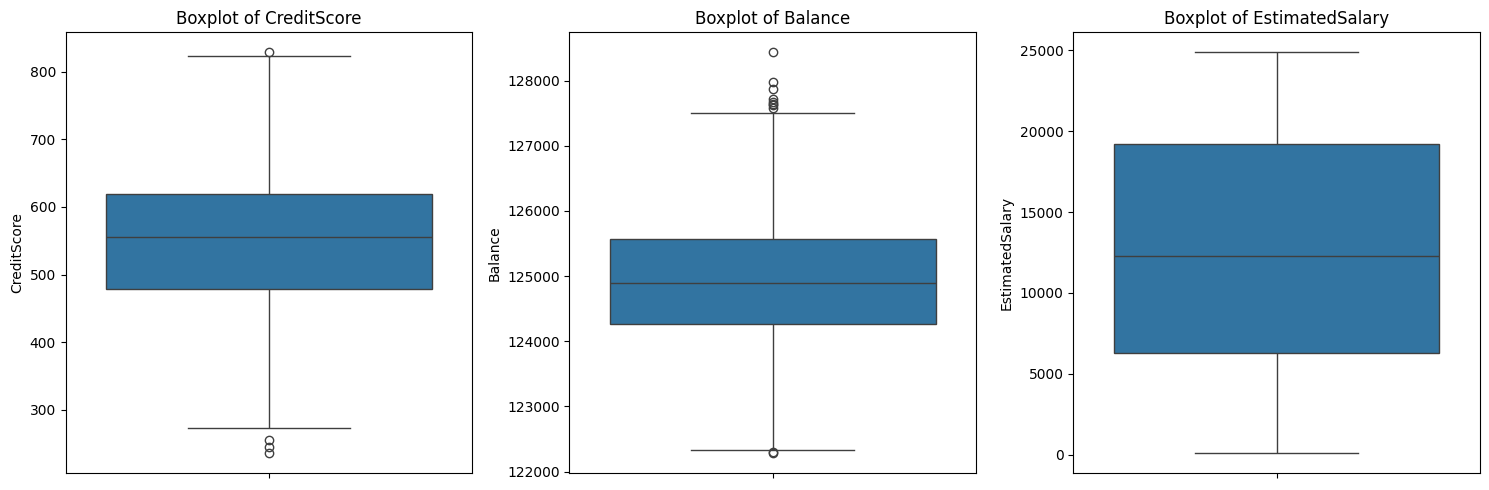

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pick the three continuous variables you want to plot
cont_vars = ['CreditScore', 'Balance', 'EstimatedSalary']

plt.figure(figsize=(15, 5))

for i, col in enumerate(cont_vars):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [19]:
# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the DataFrame to remove outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each column
for col in ['CreditScore', 'Balance', 'EstimatedSalary']:
    data = remove_outliers(data, col)

In [20]:
data.shape

(985, 10)

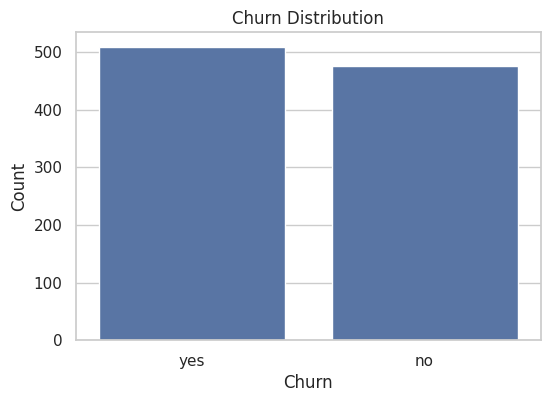

Churned: 509
Not Churned: 476
Churned Ratio: 51.68%


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# 1. Churn Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Churn')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()
print(f"Churned: {len(data[data['Churn'] == 'yes'])}")
print(f"Not Churned: {len(data[data['Churn'] == 'no'])}")
print(f"Churned Ratio: {round(len(data[data['Churn'] == 'yes']) / (len(data['Churn']))*100, 2)}%")

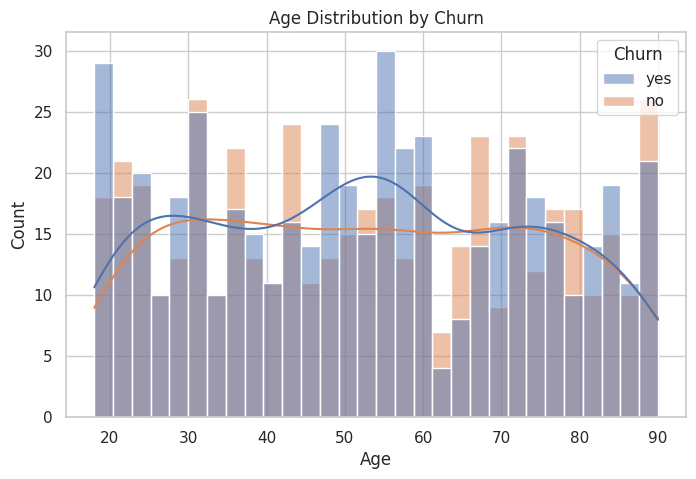

In [22]:
# 2. Age vs. Churn
plt.figure(figsize=(8,5))
sns.histplot(data=data, x='Age', hue='Churn', kde=True, bins=30)
plt.title('Age Distribution by Churn')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

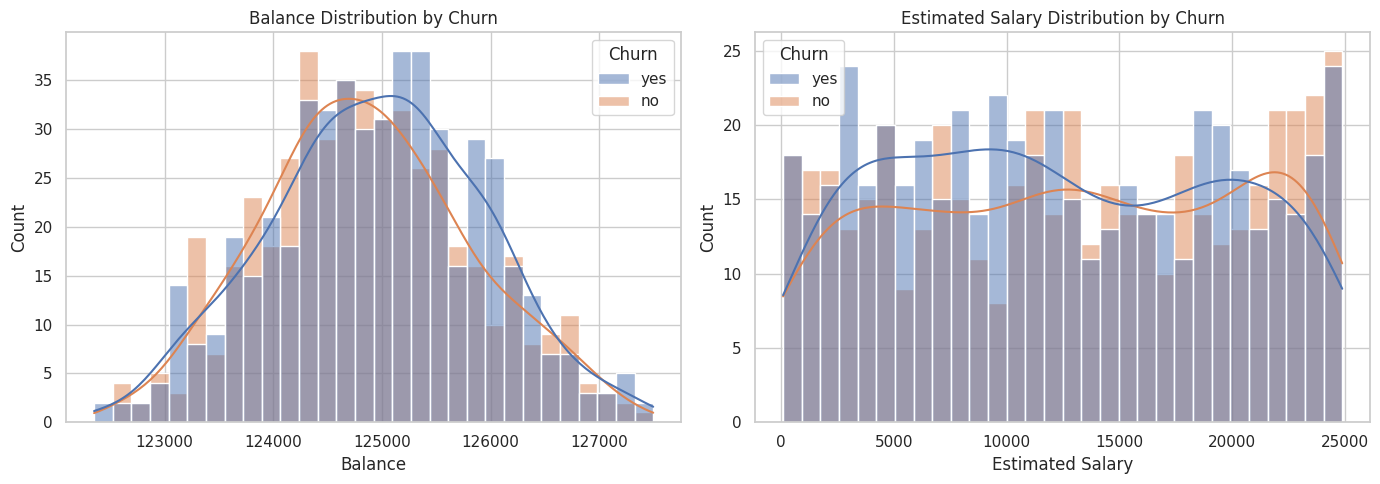

In [23]:
# 3. Account Balance & Estimated Salary Distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data=data, x='Balance', hue='Churn', kde=True, bins=30, ax=ax[0])
ax[0].set_title('Balance Distribution by Churn')
ax[0].set_xlabel('Balance')

sns.histplot(data=data, x='EstimatedSalary', hue='Churn', kde=True, bins=30, ax=ax[1])
ax[1].set_title('Estimated Salary Distribution by Churn')
ax[1].set_xlabel('Estimated Salary')

plt.tight_layout()
plt.show()

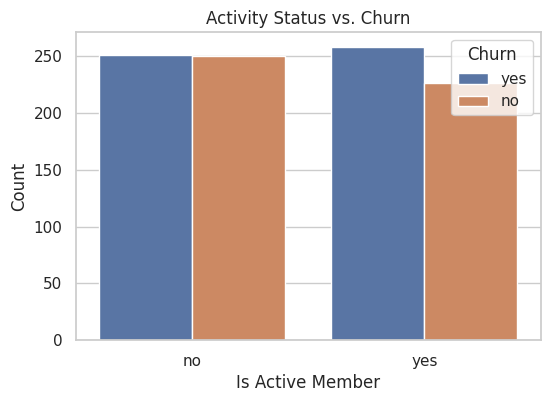

In [24]:
# 4. IsActiveMember vs. Churn
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='IsActiveMember', hue='Churn')
plt.title('Activity Status vs. Churn')
plt.xlabel('Is Active Member')
plt.ylabel('Count')
plt.show()

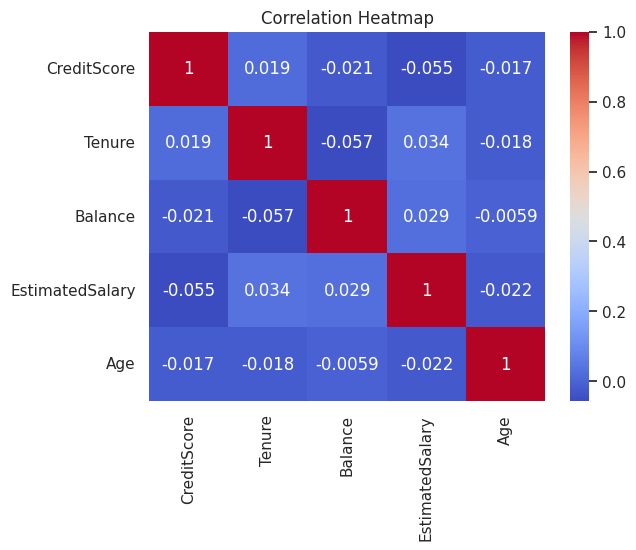

In [25]:
import seaborn as sns
import numpy as np
cor = data.corr(numeric_only=True)
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [26]:
for col in data.columns:
  print(f"{col}: {data[col].nunique()}")

CreditScore: 985
Tenure: 16
EducationLevel: 3
Balance: 985
EstimatedSalary: 985
Age: 73
IsActiveMember: 2
Location: 957
CustomerName: 979
Churn: 2


In [27]:
# Data Preprocessing
from sklearn.preprocessing import LabelEncoder

# Drop columns that won't be used as features
X = data.drop(['Churn', 'CustomerName',  'Location'], axis=1)
y = data['Churn']

# Convert categorical features to numeric
label_encoders = {}
for col in ['EducationLevel', 'IsActiveMember']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Encode target variable
y = y.map({'no': 0, 'yes': 1})

In [28]:
X.head()

,CreditScore,Tenure,EducationLevel,Balance,EstimatedSalary,Age,IsActiveMember
0,634.101301,0,0,125374.789898,527.274620,77,0
1,567.341131,0,2,125577.250264,24228.553641,37,0
2,571.659414,1,2,124384.054102,18623.496791,19,0
3,726.152743,11,0,125252.401982,11281.442229,84,0
4,483.137432,11,2,125285.444497,15271.343059,31,0


## Model Selection

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [30]:
# Model 1: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.5025380710659898
              precision    recall  f1-score   support

           0       0.47      0.46      0.46        92
           1       0.53      0.54      0.54       105

    accuracy                           0.50       197
   macro avg       0.50      0.50      0.50       197
weighted avg       0.50      0.50      0.50       197



In [31]:
# Model 2: Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=2200937)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree:
Accuracy: 0.5736040609137056
              precision    recall  f1-score   support

           0       0.54      0.66      0.59        92
           1       0.63      0.50      0.55       105

    accuracy                           0.57       197
   macro avg       0.58      0.58      0.57       197
weighted avg       0.58      0.57      0.57       197

